# Marchine Learning Challenge

## 1.Loading training data

In [ ]:
# loading data
from google.colab import files
load_data = files.upload()

Saving training_data.csv to training_data.csv


In [ ]:
# importing dataset
import numpy as np
import pandas as pd
df = pd.read_csv("training_data.csv")

## 2.EDA

### 2.1 Priting head and shape

In [ ]:
# Printing head
df.head()

id  target targetName  subject    x_0    x_1    x_2    x_3    x_4  \
0  08_213_0699       8    Fearful      213  439.3  437.6  441.8  450.7  467.2   
1  03_390_3151       3        Sad      390  382.3  383.8  387.2  392.9  406.8   
2  06_290_8569       6   Suprised      290  335.4  334.5  340.4  351.2  367.4   
3  08_201_9378       8    Fearful      201  413.5  413.4  418.7  429.8  447.9   
4  01_346_4226       1    neutral      346  400.3  401.8  407.0  414.7  428.2   

     x_5  ...   y_58   y_59   y_60   y_61   y_62   y_63   y_64   y_65   y_66  \
0  494.6  ...  551.9  544.3  527.1  522.4  524.4  523.3  529.7  527.2  528.8   
1  432.2  ...  564.7  556.0  538.4  532.5  535.1  532.9  539.4  552.4  555.4   
2  391.7  ...  550.7  544.1  524.0  511.3  510.8  509.6  519.8  525.3  526.7   
3  474.6  ...  589.4  581.6  562.9  556.8  558.9  557.5  565.7  568.6  570.1   
4  450.9  ...  549.2  542.7  527.6  528.7  529.6  527.3  525.3  528.2  529.6   

    y_67  
0  526.6  
1  552.6  
2  526.0  
3  567.2  
4  528.4  

[5 rows x 140 columns]

In [ ]:
# Printing shape
print(df.shape[0],"lignes (images)")
print(df.shape[1],"colonnes")

1286 lignes (images)
140 colonnes


### 2.2 Checking missing values, data types, dimension and class balance

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Columns: 140 entries, id to y_67
dtypes: float64(136), int64(2), object(2)
memory usage: 1.4+ MB



The dataset includes 1,286 entries and 140 columns, primarily consisting of facial landmarks data.  
There are no missing values, and the data types are appropriate for analysis

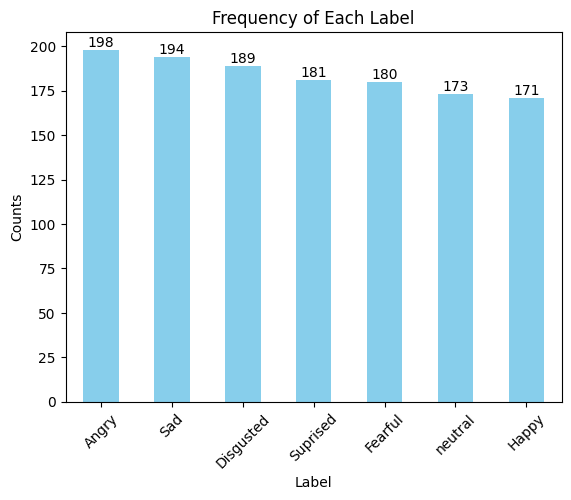

In [ ]:
import matplotlib.pyplot as plt

class_balance = df["targetName"].value_counts()

# Create the bar chart
class_balance.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Frequency of Each Label')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotates labels to prevent overlap

for index, value in enumerate(class_balance.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

The distribution of target variable is kind of balanced, so we'll keep it the same.

Now, let's move on to some visualizations to better understand the data :)

In [ ]:
# get features
X = df.drop(['id', 'targetName',"target","subject"], axis=1)
# get target
y = df["target"]

# Spliting x and y coordinates
faces_x = X.iloc[:,:68] # column 0 to 67
faces_y = X.iloc[:,68:137] # column 68 to 136

### 2.4 Plotting the data

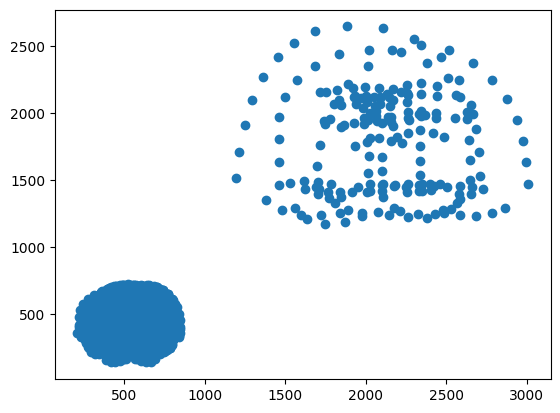

In [ ]:
# Plotting all face to check
plt.scatter(faces_x,faces_y)

The plot clearly illustrates a scaling issue, where the dispersion of facial landmarks across the coordinate space suggests inconsistent scales mostly due to variations in the poses of the subjects.

We need to scale the data uniformly to prevent distortions and ensure that all facial landmarks are treated equally, regardless of the subject's pose. This is crucial for achieving accurate and unbiased model.

So let's go ahead and scale this data

## 3.Scaling the data : Min-Max Scaling vs Z-Score Normlization

We'll compare two common data scaling methods, **Min-Max Scaling** and **Z-Score Normalization**, to see how they affect our data, particularly when dealing with coordinates data.

**Min-Max Scaling**  
This method adjusts data to a specified range, usually 0 to 1. The formula for Min-Max Scaling is:
$$
X_{\text{scaled}} = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)}
$$
Min-Max Scaling ensures all features are uniformly scaled, which is crucial for models requiring data within a specific range;  
however, it is sensitive to outliers, which can shift the entire data range.

**Z-Score Normalization**  
This approach standardizes data to have a mean of zero and a standard deviation of one. The formula for Z-Score Normalization is:
$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$
where $(\mu)$ is the mean and $(\sigma)$ is the standard deviation.  
Z-Score Normalization reduces the effect of outliers, making models more stable and less likely to be skewed, although it does not confine values to a fixed range, which might not be suitable for some models.


Before applying any scaling techniques, we will first analyze the descriptive statistics of our data to determine which scaling method is most appropriate

 ### Descriptive Statistics

In [ ]:
X.describe()

x_0          x_1          x_2          x_3          x_4  \
count  1286.000000  1286.000000  1286.000000  1286.000000  1286.000000   
mean    384.499611   386.132582   391.802722   400.595645   416.295412   
std      72.190169    72.394816    72.782869    73.315072    74.444024   
min     211.500000   219.700000   222.600000   227.500000   243.900000   
25%     346.950000   348.525000   354.350000   363.200000   379.200000   
50%     383.650000   385.550000   390.700000   398.700000   414.400000   
75%     418.775000   420.275000   427.050000   435.600000   451.350000   
max    1693.700000  1700.500000  1719.100000  1747.500000  1801.400000   

               x_5          x_6          x_7          x_8          x_9  ...  \
count  1286.000000  1286.000000  1286.000000  1286.000000  1286.000000  ...   
mean    441.958009   473.906532   513.002722   557.853421   601.904666  ...   
std      76.314929    78.878306    82.506257    88.039546    94.390411  ...   
min     274.800000   314.300000   360.200000   409.300000   456.200000  ...   
25%     404.825000   437.425000   477.900000   523.375000   566.525000  ...   
50%     438.950000   471.250000   510.400000   555.700000   598.850000  ...   
75%     476.475000   507.500000   545.600000   589.300000   632.675000  ...   
max    1892.500000  2017.100000  2164.100000  2342.700000  2516.900000  ...   

              y_58         y_59         y_60         y_61         y_62  \
count  1286.000000  1286.000000  1286.000000  1286.000000  1286.000000   
mean    560.972240   553.567418   534.586781   527.957932   528.847201   
std      83.979435    81.911621    78.770289    79.002828    79.404435   
min     442.400000   437.200000   420.800000   404.500000   404.900000   
25%     535.100000   528.925000   509.800000   503.700000   505.025000   
50%     556.000000   548.750000   531.550000   525.150000   525.750000   
75%     579.875000   571.250000   551.875000   544.975000   545.500000   
max    2210.000000  2172.900000  2159.500000  2124.200000  2128.400000   

              y_63         y_64         y_65         y_66         y_67  
count  1286.000000  1286.000000  1286.000000  1286.000000  1286.000000  
mean    526.815552   531.893235   537.315319   539.594090   538.350389  
std      79.117381    79.218504    81.285855    81.686531    81.227158  
min     406.300000   424.600000   421.500000   422.200000   419.900000  
25%     502.900000   507.925000   512.850000   515.325000   514.075000  
50%     523.300000   527.750000   532.250000   534.700000   533.350000  
75%     543.675000   548.300000   555.075000   557.300000   556.000000  
max    2121.900000  2153.400000  2128.900000  2144.100000  2133.800000  

[8 rows x 136 columns]

#### Boxplots

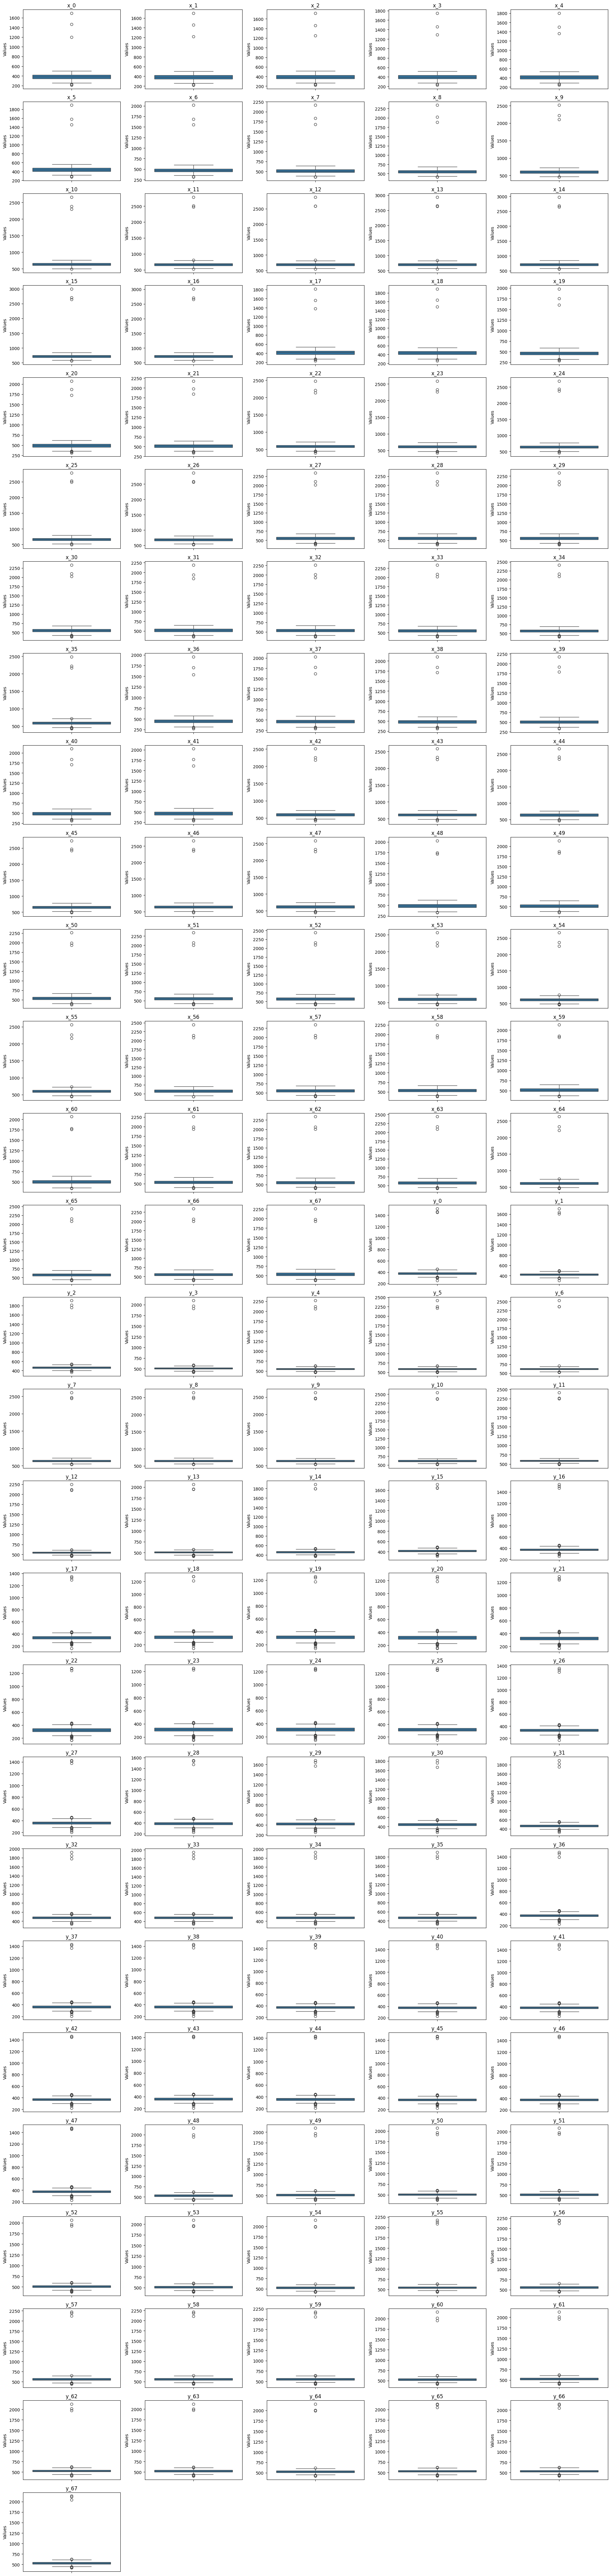

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure (adjust figsize to fit your screen as needed)
fig, axes = plt.subplots(nrows=28, ncols=5, figsize=(20, 28 * 3))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over each column and create a boxplot
for i, col in enumerate(X.columns):
    if col.startswith('x_') or col.startswith('y_'):
        sns.boxplot(y=X[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_ylabel('Values')
    else:
        axes[i].set_visible(False)  # Hide unused subplots

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### Key Observations

- **Extreme Values:**
  The highest values exceed the 75th percentiles, indicating notable outliers. These outliers can distort data distribution and impact sensitive models.

- **Symmetry around the Mean:**
  The mean aligns well with the median and the midpoint of the Interquartile Range $(IQR = (Q3 + Q1) / 2)$. This indicates a uniform and symmetric distribution, typical of normal distributions.

- **Impact on Classification Models:**
This symmetry reduces bias related to class imbalance and outliers, leading to more accurate predictions across various scenarios. Such distributions help in maintaining a balanced representation of classes, enhancing model performance



$\rightarrow$ Based on these observations we can conclude that Z-Score Normlization is best suited for our data but we will do the comparison

### 3.1 Z-score Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Standardize x and y coordinates separately across Individuals

# Because StandardScaler works column-wise, we'll need to transpose the DataFrame first
x_coor = X.iloc[:,:68].T
y_coor = X.iloc[:,68:137].T

# scale it, and then transpose it back
x_stand = scaler.fit_transform(x_coor).T
y_stand = scaler.fit_transform(y_coor).T

# concatenate column wise and make it dataframe
X_standardized = pd.DataFrame(np.concatenate((x_stand,y_stand), axis=1), columns=X.columns)

# Then standardized across Features
x_y_stand = scaler.fit_transform(X_standardized)

# concatenate column wise and make it dataframe
X_standardized2 = pd.DataFrame(x_y_stand, columns=X.columns)

#### Results

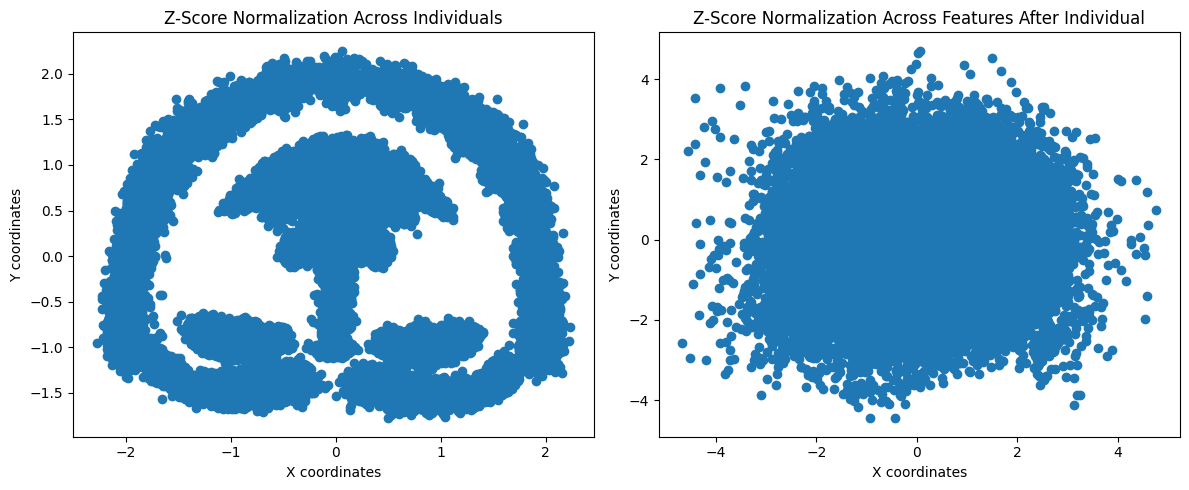

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the first standardized dataset
ax1.scatter(X_standardized.iloc[:,:68].values.flatten(), X_standardized.iloc[:,68:137].values.flatten())
ax1.set_title('Z-Score Normalization Across Individuals')
ax1.set_xlabel('X coordinates')
ax1.set_ylabel('Y coordinates')

# Plotting the second standardized dataset
ax2.scatter(X_standardized2.iloc[:,:68].values.flatten(), X_standardized2.iloc[:,68:137].values.flatten())
ax2.set_title('Z-Score Normalization Across Features After Individual')
ax2.set_xlabel('X coordinates')
ax2.set_ylabel('Y coordinates')

plt.tight_layout()
plt.show()

In the first step, we use z-score normalization on each individual face to make sure physical differences  don't affect our analysis. In the second step, we normalize across all the features in the dataset to make sure all measurements are consistent.

**Why is it beneficial?**  
This approach reduces biases from physical differences that aren't linked to emotions, such as how far away the subject is from the camera or how big their face is. By normalizing both on an individual level and across all data, the method improves the model's ability to accurately recognize and understand facial expressions, increasing both its accuracy and reliability.


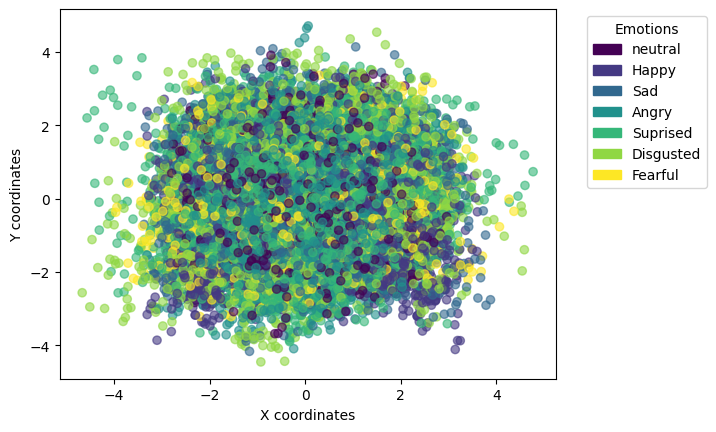

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Creating a color map from unique y values
unique_emotions = np.unique(y)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_emotions)))
color_map = {emotion: color for emotion, color in zip(unique_emotions, colors)}
# Prepare colors for each point
c = np.array([color_map[val] for val in y]).repeat(68, axis=0)
target_name_map = dict(zip(df['target'], df['targetName']))

fig, ax = plt.subplots()

# Plotting the standardized dataset
scatter = ax.scatter(X_standardized2.iloc[:,:68].values.flatten(),X_standardized2.iloc[:,68:137].values.flatten(),
                     c=c, alpha=0.6)
ax.set_xlabel('X coordinates')
ax.set_ylabel('Y coordinates')

legend_items = [mpatches.Patch(color=color, label=f'{target_name_map[emotion]}') for emotion, color in color_map.items()]
ax.legend(handles=legend_items, title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


The graph shows considerable overlap of points across different emotion categories, indicating low inter-class variance. This overlap suggests that distance-based models like KNN might struggle due to the lack of distinct clusters for each emotion.   
  
On the other hand, models that focus on how features relate to each other and the general spread of the data can still work well. For instance, models that use logistic functions or other ways to manage data that mixes together might be stronger in this situation because they don’t need clear separate groups to tell the categories apart.







### Showing distribution for each predictor

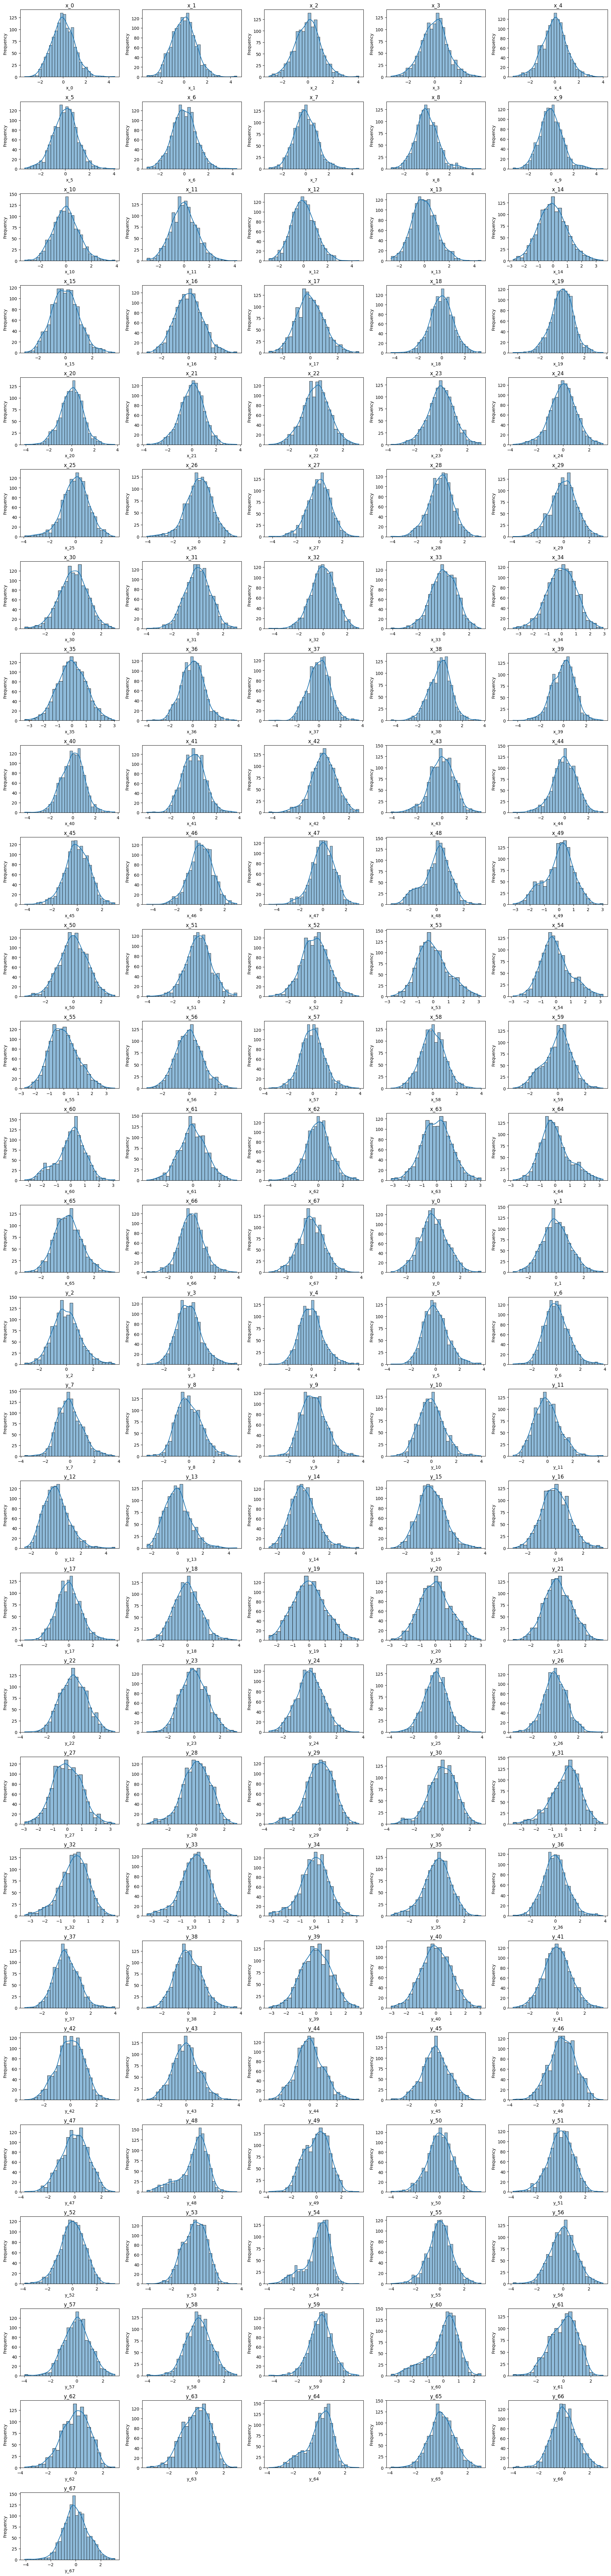

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure (adjust figsize to fit your screen as needed)
fig, axes = plt.subplots(nrows=28, ncols=5, figsize=(20, 28 * 3))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over each column and create a histogram/density plot
for i, col in enumerate(X_standardized2.columns):
    if col.startswith('x_') or col.startswith('y_'):
        sns.histplot(X_standardized2[col], kde=True, ax=axes[i])  # Change to histplot for histogram with density
        axes[i].set_title(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].set_visible(False)  # Hide unused subplots

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### 3.2 Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Initialize the scaler
scaler2 = MinMaxScaler()

# Normalize x and y coordinates separately across Individuals
x_norm = scaler2.fit_transform(x_coor).T
y_norm = scaler2.fit_transform(y_coor).T

# concatenate column wise and make it dataframe
X_normalized = pd.DataFrame(np.concatenate((x_norm,y_norm), axis=1), columns=X.columns)

# Then standardized across Features
x_y_norm = scaler.fit_transform(X_normalized)

# concatenate column wise and make it dataframe
X_normalized2 = pd.DataFrame(x_y_norm, columns=X.columns)

#### Results


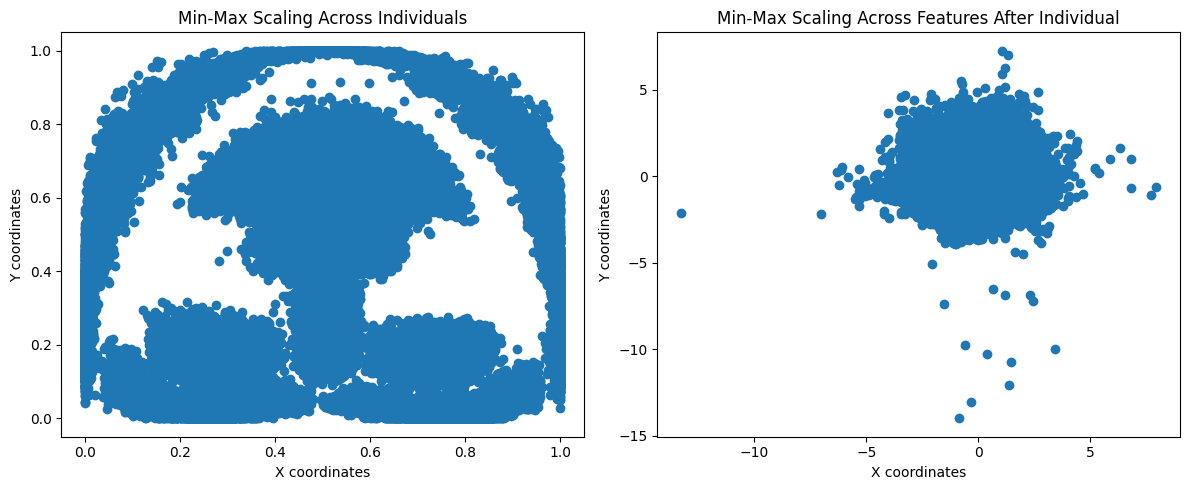

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the first normalized dataset
ax1.scatter(X_normalized.iloc[:,:68].values.flatten(), X_normalized.iloc[:,68:137].values.flatten())
ax1.set_title('Min-Max Scaling Across Individuals')
ax1.set_xlabel('X coordinates')
ax1.set_ylabel('Y coordinates')

# Plotting the second normalized dataset
ax2.scatter(X_normalized2.iloc[:,:68].values.flatten(), X_normalized2.iloc[:,68:137].values.flatten())
ax2.set_title('Min-Max Scaling Across Features After Individual')
ax2.set_xlabel('X coordinates')
ax2.set_ylabel('Y coordinates')

plt.tight_layout()
plt.show()

As expected, the values at the extreme ends are "squeezed" to the edges because of the extreme values in the data. This happens when using min-max scaling, which adjusts all data points based on the smallest and largest values, causing distortion when outliers are present. Given this effect, we'll continue with z-score normalization to handle these extremes more effectively.

# 4.Selecting the best model

## 4.1 train test split : 30% test/70% train

In [ ]:
# train_test_split 30% test 70% train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized2, y, test_size=0.3, random_state=42)

## 4.2 Testing Multiple Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# list of parameters to test
log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{"var_smoothing": 1e-09}, {"var_smoothing": 1e-08}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
SGD_params = [{"eta0":0.000001},{"eta0":0.0001},{"eta0":0.001},{"eta0":0.01}]

# liste of models to test
modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ["random forest", RandomForestClassifier, rand_for_params],
    ["k neighbors", KNeighborsClassifier, kneighbors_params],
    ["naive bayes", GaussianNB, naive_bayes_params],
    ["support vector machines", SVC, svc_params],
    ["Stochastic gradient descent", SGDClassifier, SGD_params]
]

# Testing models
insights = []
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        insights.append((modelname, model, params, score))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### Results

In [ ]:
# Printing results
insights.sort(key=lambda x:x[-1], reverse=True)
for modelname, model, params, score in insights:
    print(modelname, params, score)

log regression {'C': 0.1} 0.7383419689119171
log regression {'C': 1} 0.7227979274611399
Stochastic gradient descent {'eta0': 1e-06} 0.7124352331606217
log regression {'C': 10} 0.7072538860103627
log regression {'C': 0.01} 0.6968911917098446
Stochastic gradient descent {'eta0': 0.01} 0.694300518134715
Stochastic gradient descent {'eta0': 0.0001} 0.689119170984456
support vector machines {'C': 1} 0.6709844559585493
support vector machines {'C': 10} 0.6632124352331606
Stochastic gradient descent {'eta0': 0.001} 0.6580310880829016
random forest {'criterion': 'gini'} 0.6502590673575129
random forest {'criterion': 'entropy'} 0.6321243523316062
naive bayes {'var_smoothing': 1e-09} 0.5699481865284974
naive bayes {'var_smoothing': 1e-08} 0.5699481865284974
support vector machines {'C': 0.1} 0.5518134715025906
decision tree {'criterion': 'gini'} 0.5233160621761658
decision tree {'criterion': 'entropy'} 0.5129533678756477
k neighbors {'n_neighbors': 5} 0.4844559585492228
k neighbors {'n_neighbors

Models like logistic regression and SGD, which benefit from regularization, perform best. This suggests that there's likely a linear relationship between predictors and the target variable, and that regularization helps manage issues such as multicollinearity among predictors.  

In contrast, models relying on spatial proximity or complex boundary definitions, like KNN and decision trees, perform poorly,  due to overlapping classes and a lack of distinct clusters in the data.


$→$
Based on these results, we will choose the logistic regression model and work on fine-tuning the regularization hyperparameter C

# 5.Logistic Regression

## 5.1 hyperparameters tuning : exhaustive search by cross-validation

In [ ]:
logModel = LogisticRegression(max_iter=50000)

param_grid = [
    {
     'C' : np.logspace(-2, 1, 50)
    }
]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=50000), n_jobs=-1,
             param_grid=[{'C': array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ])}],
             verbose=True)

In [ ]:
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("Accuracy :",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)


 The best estimator across ALL searched params:
 LogisticRegression(C=1.5998587196060574, max_iter=50000)
Accuracy : 0.78

 The best parameters across ALL searched params:
 {'C': 1.5998587196060574}



The optimized logistic regression model achieved an accuracy mean score of 0.78 in the validation set

## 5.2 evaluating performance on testing set

In [ ]:
best_clf = clf.best_estimator_
best_clf.score(X_test,y_test)

0.7305699481865285

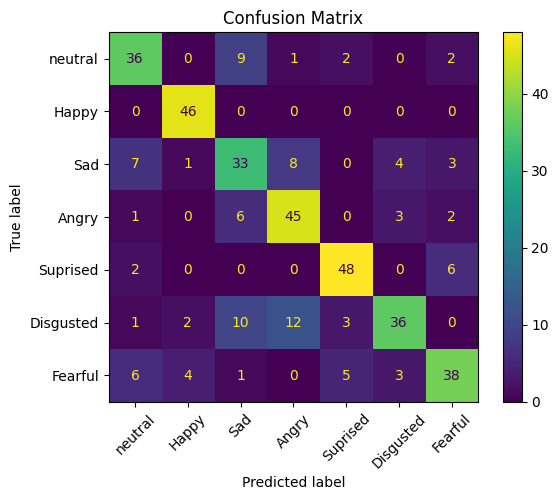

              precision    recall  f1-score   support

           1       0.68      0.72      0.70        50
           2       0.87      1.00      0.93        46
           3       0.56      0.59      0.57        56
           5       0.68      0.79      0.73        57
           6       0.83      0.86      0.84        56
           7       0.78      0.56      0.65        64
           8       0.75      0.67      0.70        57

    accuracy                           0.73       386
   macro avg       0.73      0.74      0.73       386
weighted avg       0.73      0.73      0.73       386



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ordered_label = [target_name_map[label] for label in best_clf.classes_]
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_label)

cm_disp.plot()
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

print(classification_report(y_test, y_pred))


The model's overall accuracy is 73% on testing set, showing it performs well in certain cases but struggles with others.  
 Happy and Surprised emotions are identified with high accuracy, indicating that these emotions have distinct features that the model easily recognizes.  
  However, the model has difficulty distinguishing between Sad, Fearful, and Disgusted, as these emotions often overlap in facial expressions, leading to higher misclassification rates.

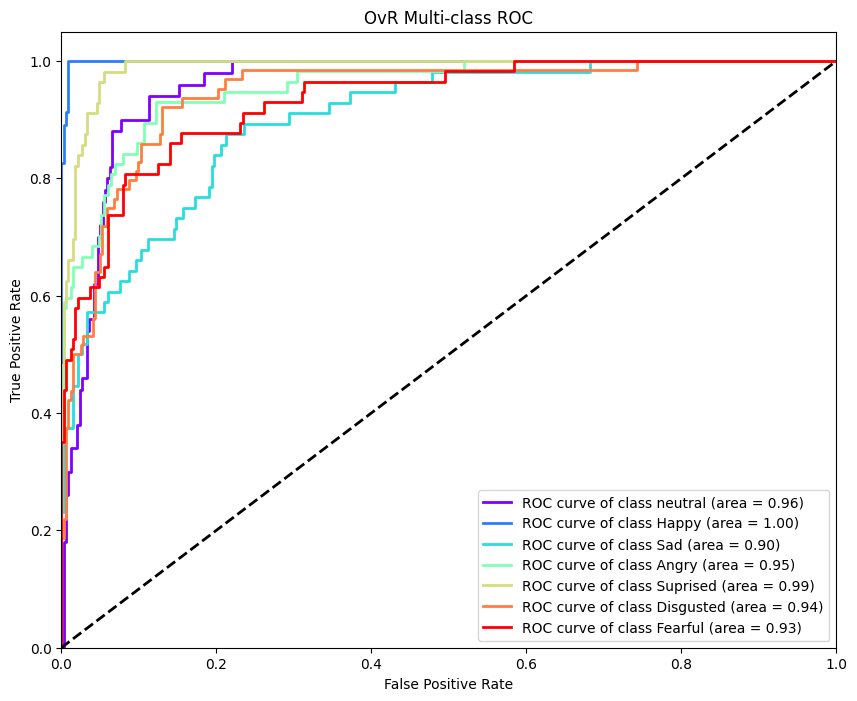

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
y = label_binarize(y_test, classes=list(best_clf.classes_))
n_classes = y.shape[1]

# Get class scores (probabilities)
y_score = best_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colors for each class
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {ordered_label[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OvR Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


# 6.Save Final Model


In [ ]:
from joblib import dump
# Save the best classifier to a file
dump(best_clf, 'em_rc_model.joblib')

['em_rc_model.joblib']